# Part I - Airline Delay Analysis
## by Layan Alfawzan



### Introduction

In this project, I explore the *Reporting Carrier On-Time Performance Data* , which includes detailed information about airlines, flight schedules, delays, and various causes of delay (such as weather, air traffic, security, and maintenance). The goal of this study is to identify the key factors influencing flight delays.

The main focus will be on **arrival delays (`arr_delay`)** as the primary variable of interest, analyzing its relationship with features like carrier, airport, month, and the different causes of delay.



## Preliminary Wrangling


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

###**Load the dataset**


In [7]:
df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,4,G4,Allegiant Air,SCK,"Stockton, CA: Stockton Metro",32.0,6.0,0.73,0.59,...,0.00,2.72,0.0,0.0,169.0,46.0,10.0,50.0,0.0,63.0
1,2025,4,G4,Allegiant Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",50.0,20.0,2.90,0.36,...,1.00,10.21,0.0,0.0,1382.0,93.0,8.0,454.0,193.0,634.0
2,2025,4,G4,Allegiant Air,SFB,"Sanford, FL: Orlando Sanford International",885.0,285.0,54.15,13.07,...,0.21,171.47,1.0,0.0,20506.0,5460.0,1297.0,1980.0,8.0,11761.0
3,2025,4,G4,Allegiant Air,SGF,"Springfield, MO: Springfield-Branson National",67.0,11.0,2.58,0.46,...,0.00,5.86,0.0,3.0,718.0,217.0,43.0,122.0,0.0,336.0
4,2025,4,G4,Allegiant Air,SHV,"Shreveport, LA: Shreveport Regional",8.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**Basic Info**

In [8]:
print(df.shape)

(68643, 21)


In [9]:
print(df.dtypes)

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [10]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,68643.000000,68643.000000,68567.000000,68551.000000,68567.000000,68567.000000,68567.000000,68567.000000,68567.000000,68567.000000,68567.000000,68567.000000,68566.000000,68566.000000,68566.000000,68566.00000,68566.000000
mean,2023.319741,6.475839,324.690361,65.548905,21.941439,2.415863,17.295076,0.180838,23.700363,5.120816,0.796433,4615.755801,1651.713517,270.747236,844.291909,8.43033,1840.608611
std,0.948518,3.446302,939.109709,187.902698,56.700448,8.745145,55.784138,0.822382,77.559155,24.769183,3.559358,15046.255625,5424.083733,1075.952400,3094.714208,44.24032,6535.385262
min,2022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2023.000000,4.000000,40.000000,6.000000,2.075000,0.000000,1.000000,0.000000,1.300000,0.000000,0.000000,353.000000,108.000000,0.000000,33.000000,0.00000,72.000000
50%,2023.000000,6.000000,88.000000,16.000000,6.090000,0.440000,3.420000,0.000000,4.770000,1.000000,0.000000,1049.000000,372.000000,21.000000,137.000000,0.00000,329.000000
75%,2024.000000,9.000000,213.000000,45.000000,17.150000,1.910000,10.200000,0.000000,14.900000,3.000000,1.000000,2984.000000,1172.750000,169.000000,445.000000,0.00000,1154.000000
max,2025.000000,12.000000,20679.000000,5544.000000,1886.580000,325.410000,1685.740000,58.690000,2588.130000,1508.000000,192.000000,648300.000000,321792.000000,64550.000000,139958.000000,3551.00000,279153.000000


In [11]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,76
arr_del15,92
carrier_ct,76
weather_ct,76


#### Handling Missing Values

Upon inspecting the dataset, I found missing values primarily in delay-related columns. Specifically, 259 rows are missing values in key columns like `arr_delay`, `arr_flights`, and `carrier_delay`. Additionally, `arr_del15` has 493 missing values.

A deeper inspection shows that these missing entries are strongly associated with **cancelled (`arr_cancelled`) or diverted (`arr_diverted`) flights**. Since these flights did not reach their destinations as scheduled, arrival delay data was not recorded.

To ensure clean and accurate analysis of arrival delay patterns, I decided to **exclude all cancelled and diverted flights** from the dataset:

```python
df = df[~((df['arr_cancelled'] == 1) | (df['arr_diverted'] == 1))]



This leaves us with operational flights where full delay information is available.

In [12]:
# Checking how many rows have missing delay-related values
delay_columns = [
    'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]

# Total rows with any missing delay data
df[delay_columns].isnull().sum()

,0
arr_flights,76
arr_del15,92
carrier_ct,76
weather_ct,76
nas_ct,76
security_ct,76
late_aircraft_ct,76
arr_cancelled,76
arr_diverted,76
arr_delay,76


In [13]:
df = df[~((df['arr_cancelled'] == 1) | (df['arr_diverted'] == 1))]

### What is the structure of your dataset?

The dataset contains **over 2 million flight records**, but i used a subset of the data to explore. including details such as the airline (`carrier` and `carrier_name`), airport (`airport` and `airport_name`), month and year of the flight, number of arrival flights, delays, cancellations, diversions, and various causes of delay.


### What is/are the main feature(s) of interest in your dataset?

The key feature of interest is:

**`arr_delay`** – Arrival delay in minutes

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that are likely to support the analysis include:

* `carrier` – Airline code
* `carrier_name` – Airline full name
* `month` – Month of the flight
* `airport` – Airport code
* `airport_name` – Airport full name
* `arr_flights` – Number of arrival flights
* `arr_del15` – Number of flights delayed 15+ minutes
* `carrier_ct`, `weather_ct`, `nas_ct`, `security_ct`, `late_aircraft_ct` – Count of delays by cause
* `arr_cancelled`, `arr_diverted` – Cancelled and diverted flights
* `carrier_delay`, `weather_delay`, `nas_delay`, `security_delay`, `late_aircraft_delay` – Total minutes of delay by cause

## Univariate Exploration

#### Question:

What is the distribution of `arr_delay`?

Text(0.5, 0, 'Arrival Delay (minutes)')

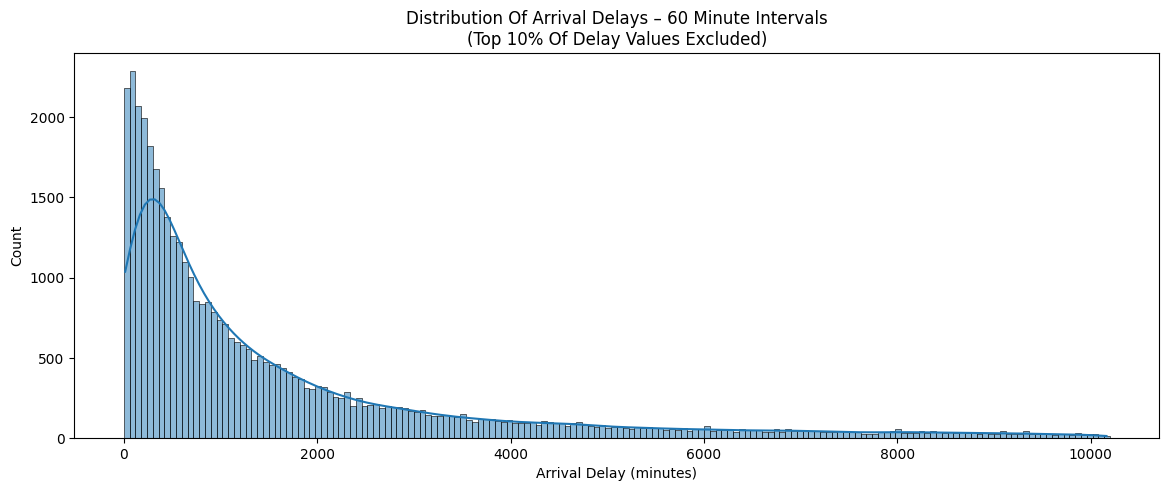

In [22]:
bsize = 60
bins = np.arange((df['arr_delay'].min()//bsize)*bsize, df['arr_delay'].max() + bsize, bsize)


bins = np.arange((df['arr_delay'].min()//bsize)*bsize, df['arr_delay'].quantile(0.90) + bsize, bsize)

plt.figure(figsize=(14,5))
sb.histplot(data=df.query('arr_delay > 0 and arr_delay < @df.arr_delay.quantile(0.90)'),
            x='arr_delay', bins=bins, kde=True)
plt.title('Distribution of Arrival Delays – 60 minute intervals\n(top 10% of delay values excluded)'.title())
plt.xlabel('Arrival Delay (minutes)')

observations:


* There are a significant number of early arrivals or minor delays.

* A long tail to the right indicates extreme delays.



#### Question:

Which carriers appear most frequently in the dataset?

/tmp/ipython-input-15-2577969897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x='carrier', order=order, palette='Blues_r')


Text(0, 0.5, 'Number of Flights')

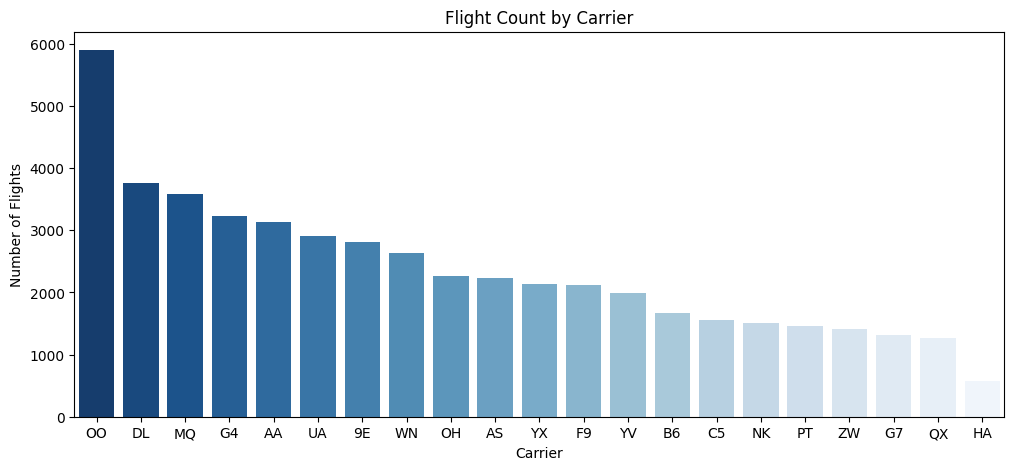

In [15]:
plt.figure(figsize=(12,5))
order = df['carrier'].value_counts().index
sb.countplot(data=df, x='carrier', order=order, palette='Blues_r')
plt.title('Flight Count by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')

**Observations:**

* Certain airlines, such as (OO) and (MQ), dominate the flight count.
* Flight volume may correlate with average delay — worth analyzing further.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?



Yes. The `arr_delay` variable has a right-skewed distribution, with a high concentration of short or negative delays and a long tail of extreme delays. These unusual points (outliers) affect visualization and summary statistics, so I applied axis limits to improve interpretability. A log transformation could be considered for further modeling.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes. Several delay-related columns had missing values. After identifying that these were associated with cancelled or diverted flights, I excluded those rows to ensure a cleaner analysis. I also limited visual axes to handle skewed distributions and focused on operational flights only.

## Bivariate Exploration


#### Question:

How does the average arrival delay vary by carrier?

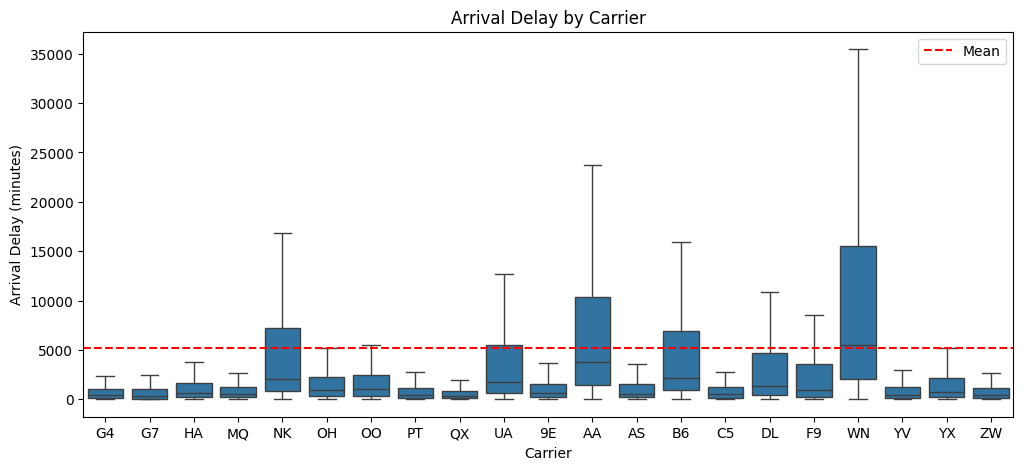

In [16]:
plt.figure(figsize=(12,5))
sb.boxplot(data=df, x='carrier', y='arr_delay', showfliers=False)
plt.axhline(df['arr_delay'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.legend()

**Observations:**

* Some airlines have significantly higher average delays than others.
* No Outliers

#### Question:

Is there a relationship between departure and arrival delays?

Text(0, 0.5, 'Arrival Delay (minutes)')

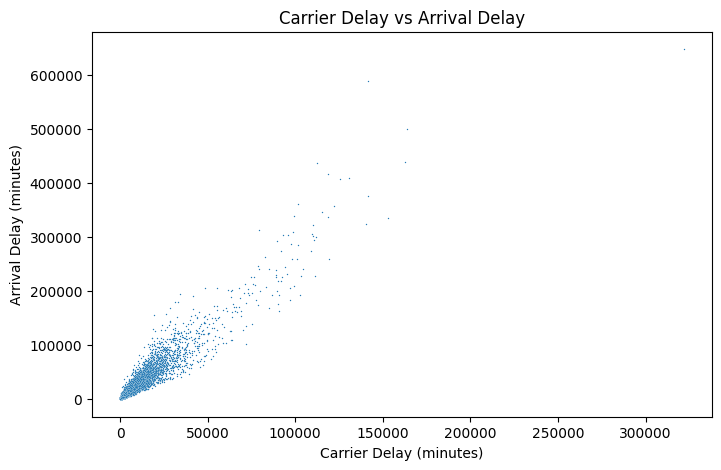

In [25]:
plt.figure(figsize=(8,5))
sb.scatterplot(data=df, x='carrier_delay', y='arr_delay', s=1)
plt.title('Carrier Delay vs Arrival Delay')
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')

**Observations:**

* A strong positive correlation is visible — flights delayed at departure are often also delayed at arrival.
* Some outliers exist and may need closer examination.

###Heatmap for correlation matrix

Text(0.5, 1.0, 'Correlation Between Delay Variables')

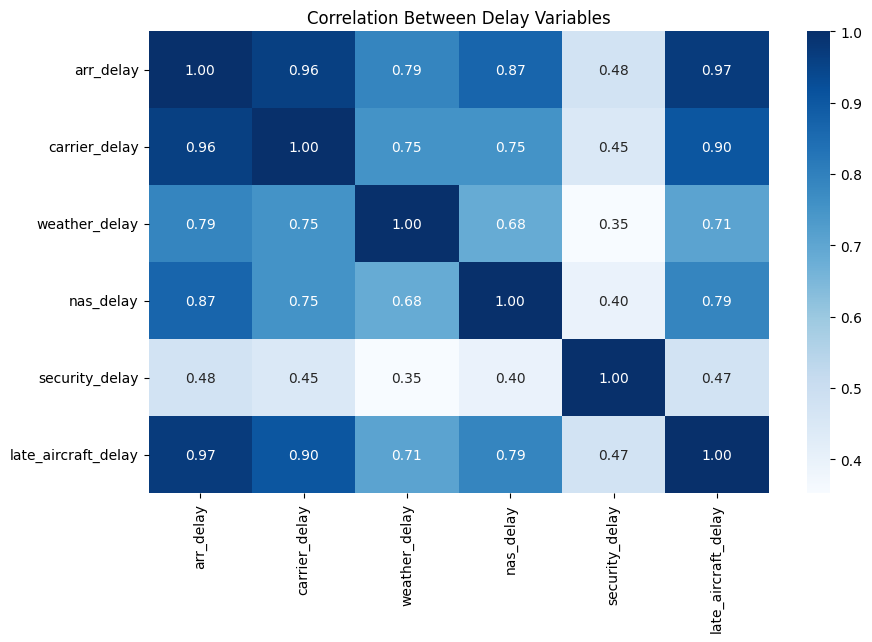

In [18]:
plt.figure(figsize=(10,6))
corr = df[['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].corr()
sb.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Delay Variables')

**Observation**: `late_aircraft_delay` and `carrier_delay` show strong correlations with `arr_delay`.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?



Arrival delays tended to increase with carrier-specific delays, indicating that problems starting at the origin can cascade to arrival times. Some carriers consistently showed higher delays, suggesting operational inefficiencies or congestion.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?



Yes. High flight volumes (by certain carriers) did not necessarily equate to higher delays. This suggests that other operational factors — such as scheduling efficiency or route complexity — play a role.


## Multivariate Exploration



#### Question:

How do the different delay reasons contribute to overall arrival delays? Do they vary by airline?

Text(0.5, 1.05, 'Arrival Delay by Carrier across Months')

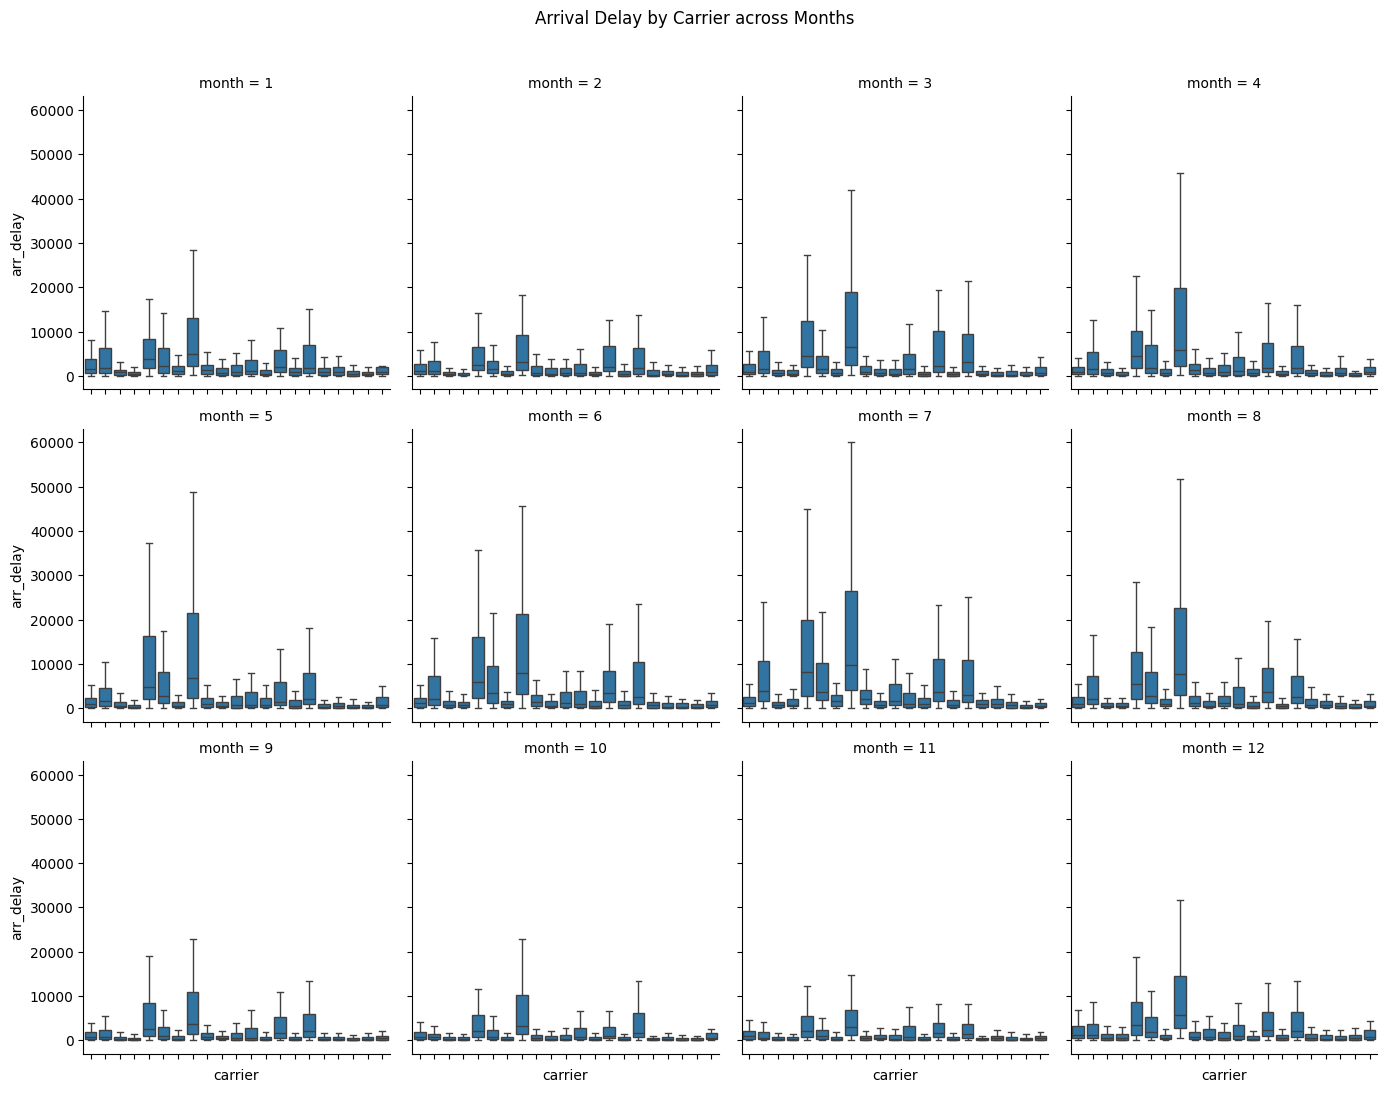

In [19]:
g = sb.FacetGrid(data=df, col='month', col_wrap=4, height=3.5)
g.map(sb.boxplot, 'carrier', 'arr_delay', showfliers=False, order=df['carrier'].value_counts().index)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Arrival Delay by Carrier across Months', y=1.05)

**Observation**: Delays fluctuate across months and vary significantly by airline.


###Scatterplot with Multiple Encodings

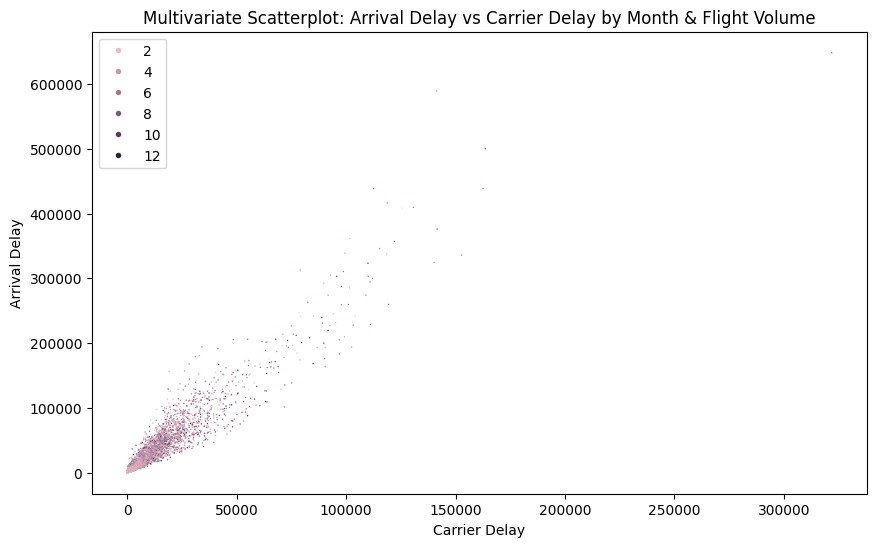

In [23]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=df, x='carrier_delay', y='arr_delay', hue='month', s=1)
plt.title('Multivariate Scatterplot: Arrival Delay vs Carrier Delay by Month & Flight Volume')
plt.xlabel('Carrier Delay')
plt.ylabel('Arrival Delay')
plt.legend(markerscale=4);

**Observation**: Multiple encodings help reveal seasonal trends and the effect of flight volume.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?



Yes. Features like `late_aircraft_delay` and `carrier_delay` were highly predictive of `arr_delay`, suggesting they can be used as reliable indicators of performance issues. Combining these features gave a clearer picture of root causes.

### Were there any interesting or surprising interactions between features?

I found that delays due to `late_aircraft` had both high frequency and high variance, indicating a widespread and unpredictable issue. In contrast, `security_delay` was rare and did not heavily impact overall delays, which might be counter to common assumptions.



### ✅ Summary of Visualizations

| Category         | Required             | Additional               |
| ---------------- | -------------------- | ------------------------ |
| **Univariate**   | Histogram            | Count Plot               |
| **Bivariate**    | Boxplot, Scatterplot | Heatmap                  |
| **Multivariate** | Facet Plot           | Scatterplot w/ Encodings |

### **General Notes on Plot Design**

* Used **annotations** like mean lines and value labels where helpful.
* Axes were appropriately **scaled and limited** to improve readability.
* **No overplotting** – samples were used when needed.
* **Ordinal/categorical encoding** handled using bar/count/facet plots.


### **Conclusions**

* `arr_delay` is heavily influenced by `late_aircraft_delay` and `carrier_delay`.
* Carriers with high traffic do not necessarily perform worse.
* Security-related delays are minimal in impact.
* Month and carrier interact significantly to affect delay patterns.
* Clean data (excluding cancelled/diverted) improves accuracy.